In [1]:
import pandas as pd

In [33]:
private = pd.read_csv("http://cssbook.net/d/private_capital.csv")
private = private.melt(id_vars="Year", var_name="country", 
                       value_name="capital")
private.head()

,Year,country,capital
0,1970,U.S.,3.42
1,1971,U.S.,3.41
2,1972,U.S.,3.49
3,1973,U.S.,3.39
4,1974,U.S.,3.21


Text(0.5, 1.0, 'Private and Public Capital in Europe, 1970 - 2010\nPartial reproduction of Piketty 2014, fig 4.4')

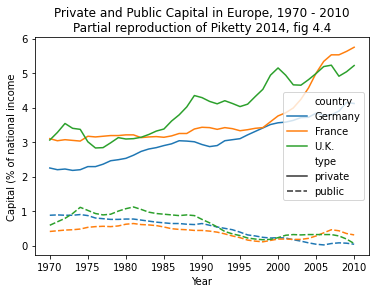

In [57]:
import seaborn as sns
public = pd.read_csv("http://cssbook.net/d/public_capital.csv")
public = public.melt(id_vars="Year", var_name="country", value_name="capital")
d = pd.concat([private.assign(type='private'), 
               public.assign(type='public')])
d = d.loc[d.country.isin({"France", "U.K.", "Germany"})]
plt = sns.lineplot(data=d, x="Year", y="capital", hue="country", style="type")
plt.set(ylabel='Capital (% of national income')
plt.set_title("Private and Public Capital in Europe, 1970 - 2010" 
              "\nPartial reproduction of Piketty 2014, fig 4.4")


In [153]:
#1 Input: Read the data into a data frame
d = pd.read_excel("http://cssbook.net/d/Chapitre8TableauxGraphiques.xls", 
                  sheet_name="TS8.2", skiprows=4, skipfooter=3)

d = d.rename(columns={"Unnamed: 0": "year"})

#2 Reshape: Pivoting the data into long format, dropping missing values
d = d.melt(value_name="share", id_vars="year")

#3 Normalize
d[["_top", "percentile", "type", "_share", "capital_gains"]] = d.variable.str.split(n=4, expand=True)
d = d.drop(columns=["variable", "_top", "_share"])
d['capital_gains'] = d['capital_gains'].notna()

d.head()

,year,share,percentile,type,capital_gains
0,1900,0.405,10%,income,False
1,1901,NaN,10%,income,False
2,1902,NaN,10%,income,False
3,1903,NaN,10%,income,False
4,1904,NaN,10%,income,False


[Text(0, 0.5, 'Share of income going to top-1% earners'), Text(0.5, 0, 'Year')]

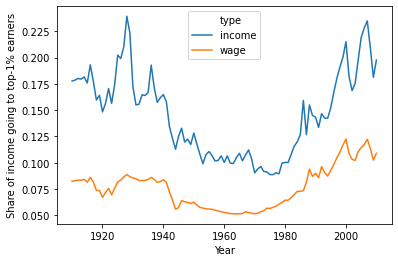

In [167]:
#4 Filter for the desired data
subset = d[(d.year >= 1910) & (d.percentile == "1%") & (d.capital_gains == False)]

#5 Analyze and/or visualize
plt = sns.lineplot(data=subset, x="year", y="share", hue="type")
plt.set(xlabel="Year", ylabel='Share of income going to top-1% earners')